 # Resume Screening with Python

In [1]:
#importing libraries
#importing numpy,pandas,matplotlib and warnings library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
#loading the data as DataFrame
#reading and storing CSV file into variabe resumeData
resumeData = pd.read_csv('resume_dataset.csv' ,encoding='utf-8')
#Creating a new column structured_resume
resumeData['structured_resume'] = ''
resumeData.head()

,Category,Resume,structured_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [3]:
#printing the unique categories presented in the resumes
print("Displaying the unique categories in resume ")
print(resumeData['Category'].unique())

Displaying the unique categories in resume 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [4]:
#Printing the unique categories of resume and number of records present
print ("Displaying the unique categories of resume and number of records")
Datas=resumeData['Category'].value_counts()
print(Datas)

Displaying the unique categories of resume and number of records
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


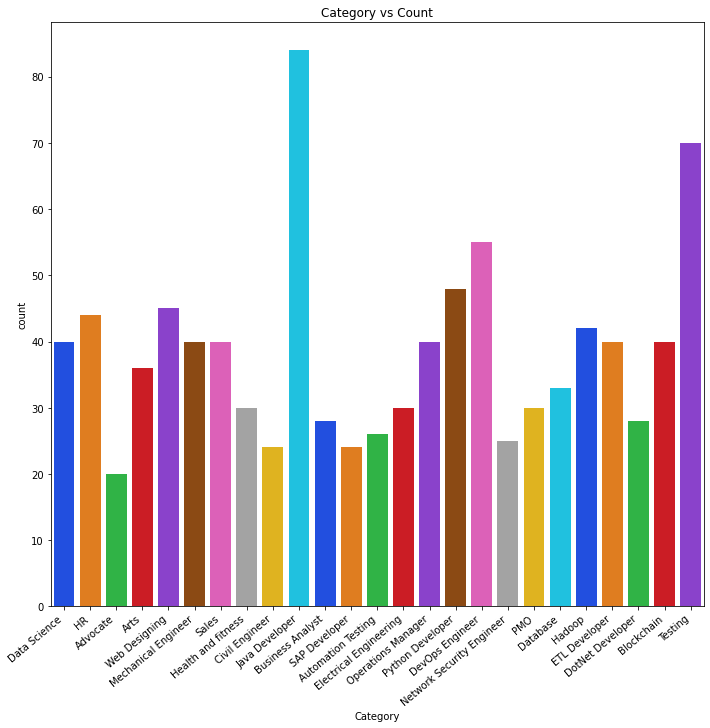

In [5]:
#Importing seaborn plotting the graph between Categories vs count
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Category", data=resumeData,palette="bright")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

In [23]:
# #plotting piechart using Matplotlib
from matplotlib.gridspec import GridSpec
targetCount = resumeData['Category'].value_counts()
targetLabel  = resumeData['Category'].unique()

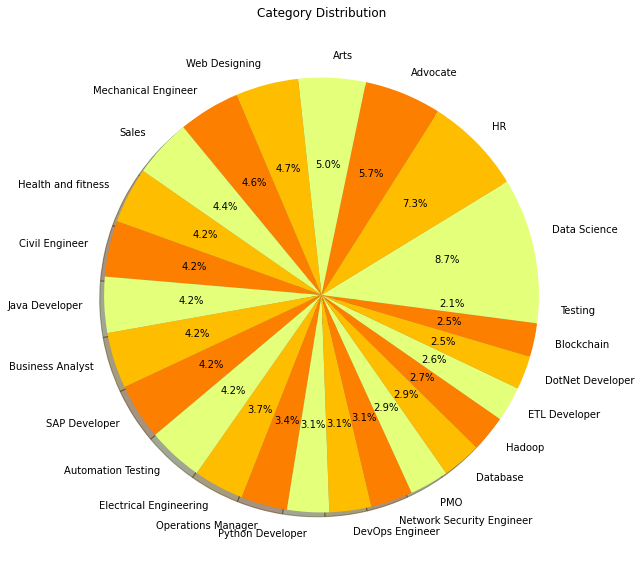

In [24]:
# #Making the square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('Wistia')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='Category Distribution')
source_pie = plt.pie(targetCount, labels=targetLabel, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [8]:
#importing re library
import re
#Function for cleaning Resume
def clean_resume(Text):
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs in the text
    Text = re.sub('@\S+', '  ', Text)  # remove mentions in the text
    Text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Text)  # remove punctuations in the text
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc in the text
    Text = re.sub('#\S+', '', Text)  # remove hashtags in the text
    Text = re.sub(r'[^\x00-\x7f]',r' ',Text) 
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace in the text
    return Text
    
resumeData['structured_resume'] = resumeData.Resume.apply(lambda x: clean_resume(x))

In [12]:
#Importing NLTK library
import nltk
from nltk.corpus import stopwords
import string
#Importing Wordcloud library
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tusharparekh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tusharparekh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#cleaning the sentences
Set_Of_StopWords = set(stopwords.words('english')+['``',"''"])
total_Words =[]
Sentences = resumeData['Resume'].values
cleaned_Sentences = ""
for i in range(0,160):
    cleanedText = clean_resume(Sentences[i])
    cleaned_Sentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in Set_Of_StopWords and word not in string.punctuation:
            total_Words.append(word)

In [14]:
#Using wordcloud we are finding the frequency of words
wordfrequencydist = nltk.FreqDist(total_Words)
mostCommon = wordfrequencydist.most_common(50)
print(mostCommon)


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


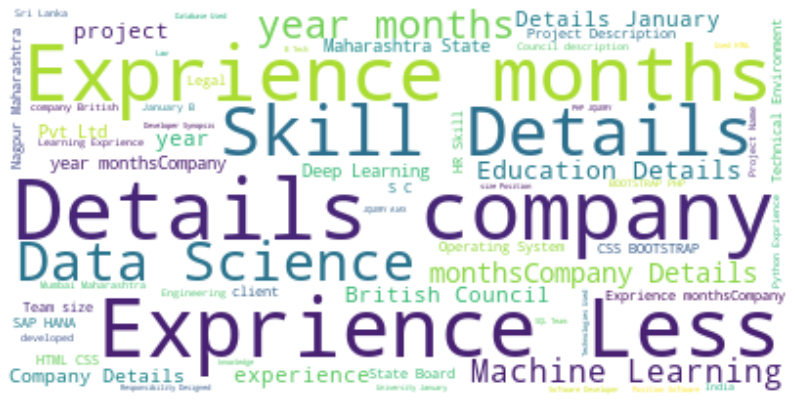

In [15]:
#plotting the frequency of words using Wordcloud library
word_cloud = WordCloud(background_color="white").generate(cleaned_Sentences)
plt.figure(figsize=(14,14))
plt.imshow(word_cloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
#Importing sklearn library
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

In [17]:
#Importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
#Converting words in to categorical values
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeData[i] = le.fit_transform(resumeData[i])

In [18]:
#mporting library from splitting training and testing dataset
from sklearn.model_selection import train_test_split
#Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
required_Text = resumeData['structured_resume'].values
required_Target = resumeData['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english',max_features=1500)
word_vectorizer.fit(required_Text)
WordFeatures = word_vectorizer.transform(required_Text)
print ("Feature completed")


Feature completed


In [19]:
#Splitting training and testing dataset
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,required_Target,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [20]:
#training the model and printing the classification report
#Here we are using the one vs the rest classifier KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("KNeighbors Classifier")
print('Accuracy on training dataset: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy on test dataset: {:.2f}'.format(clf.score(X_test, y_test)))

print(metrics.classification_report(y_test, prediction))

KNeighbors Classifier
Accuracy on training dataset: 0.99
Accuracy on test dataset: 0.99
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00    